In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from common import plot_image

### Test Adding Salt & Pepper Noise

In [2]:
def add_salt_and_pepper_noise(image, salt_vs_pepper_ratio=0.5, noise_amount=0.01):
    row, col = image.shape
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(noise_amount * image.size * salt_vs_pepper_ratio)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[tuple(coords)] = 255

    # Pepper mode
    num_pepper = np.ceil(noise_amount * image.size * (1. - salt_vs_pepper_ratio))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[tuple(coords)] = 0
    return out

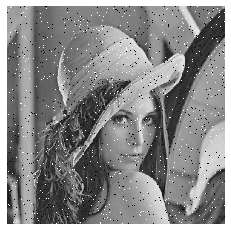

In [3]:
im = np.array(Image.open("lena512.bmp"))
im_noisy = add_salt_and_pepper_noise(im, noise_amount=0.03)
plot_image(im_noisy, plt.gca(), cmap="gray")


### Apply Median Filter

In [4]:
def median_filter(im, kernel_size=3):
    r = int((kernel_size - 1) / 2)
    out = np.zeros_like(im)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            r_st = max(0, i - r)  # row start
            r_ed = min(out.shape[0], i + r)  # row end
            c_st = max(0, j - r)  # column start
            c_ed = min(out.shape[1], j + r)  # column end
            out[i, j] = np.median(im[r_st:r_ed, c_st:c_ed])
    return out

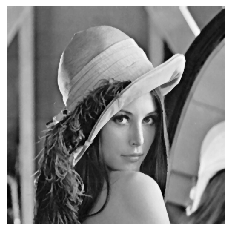

In [5]:
im_denoise = median_filter(im_noisy, kernel_size=5)
plot_image(im_denoise, plt.gca(), cmap="gray")